#📌 Extracción

In [ ]:
import requests
import pandas as pd

# URL del archivo JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Descargar el contenido JSON
response = requests.get(url)
data = response.json()  # Carga el JSON como lista/dict

# Convertir a DataFrame (aquí aplanando datos anidados según sea necesario)
df = pd.json_normalize(data)

# Mostrar las primeras filas del DataFrame
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

#🔧 Transformación

In [ ]:
import requests
import pandas as pd

# Descargar y preparar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Resumen general
print("Resumen general:")
print(df.describe(include='all'))

# Tasa de churn por contrato
print("\nTasa de churn por contrato:")
print(df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack())

# Tasa de churn por género
print("\nTasa de churn por género:")
print(df.groupby('customer.gender')['Churn'].value_counts(normalize=True).unstack())

# Estadísticas de cargos mensuales
print("\nEstadísticas de cargos mensuales:")
print(df['account.Charges.Monthly'].describe())

# Estadísticas de cargos totales
print("\nEstadísticas de cargos totales:")
print(df['account.Charges.Total'].describe())

# Distribución de antigüedad (tenure)
print("\nDistribución de antigüedad de clientes (tenure):")
print(df['customer.tenure'].value_counts().sort_index())

Resumen general:
        customerID Churn customer.gender  customer.SeniorCitizen  \
count         7267  7267            7267             7267.000000   
unique        7267     3               2                     NaN   
top     9995-HOTOH    No            Male                     NaN   
freq             1  5174            3675                     NaN   
mean           NaN   NaN             NaN                0.162653   
std            NaN   NaN             NaN                0.369074   
min            NaN   NaN             NaN                0.000000   
25%            NaN   NaN             NaN                0.000000   
50%            NaN   NaN             NaN                0.000000   
75%            NaN   NaN             NaN                0.000000   
max            NaN   NaN             NaN                1.000000   

       customer.Partner customer.Dependents  customer.tenure  \
count              7267                7267      7267.000000   
unique                2               

#📊 Carga y análisis

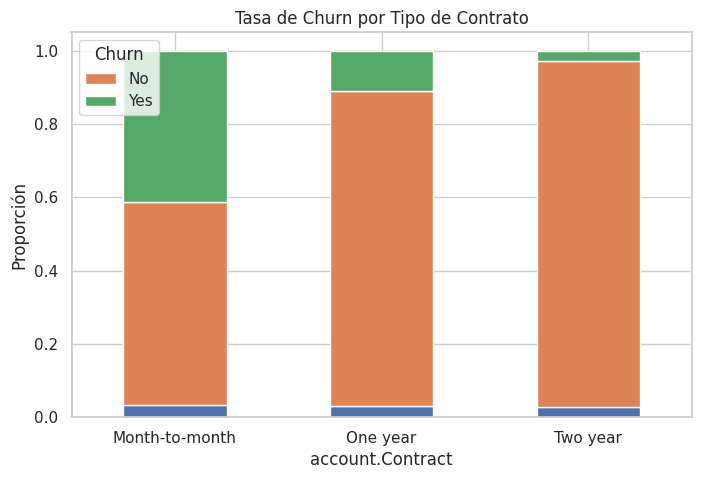

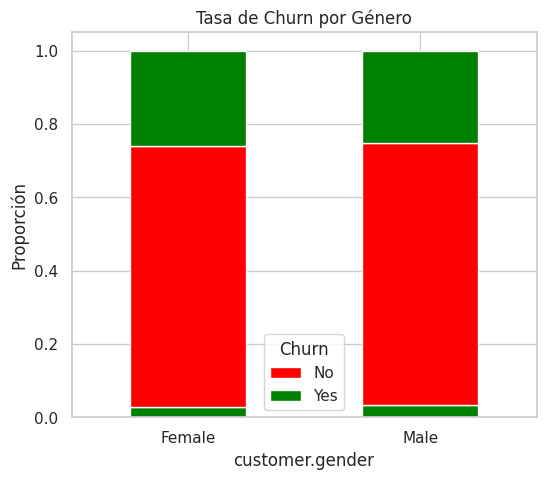

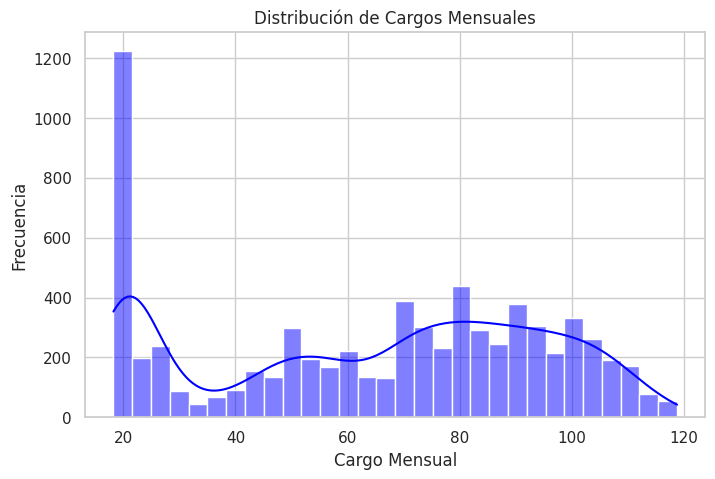

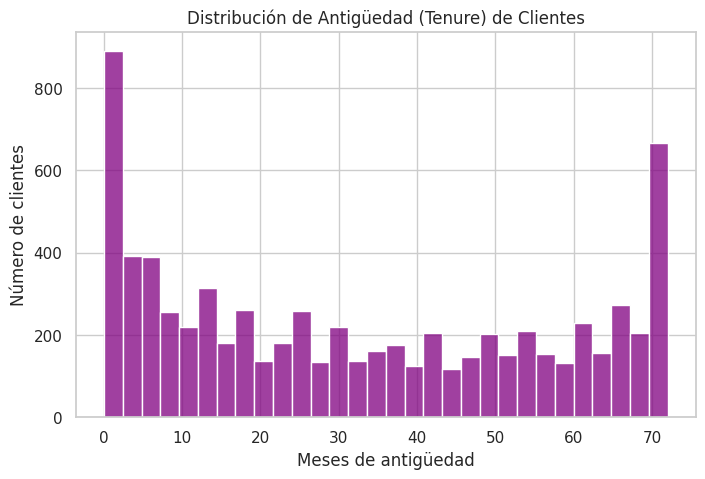

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar y preparar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Configuración general para gráficos
sns.set(style="whitegrid")

# 1. Tasa de churn por contrato
churn_contrato = df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()
churn_contrato.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Tasa de Churn por Tipo de Contrato')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

# 2. Tasa de churn por género
churn_genero = df.groupby('customer.gender')['Churn'].value_counts(normalize=True).unstack()
churn_genero.plot(kind='bar', stacked=True, figsize=(6,5), color=['green', 'red'])
plt.title('Tasa de Churn por Género')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

# 3. Distribución de cargos mensuales
plt.figure(figsize=(8,5))
sns.histplot(df['account.Charges.Monthly'], bins=30, kde=True, color='blue')
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Cargo Mensual')
plt.ylabel('Frecuencia')
plt.show()

# 4. Distribución de antigüedad (tenure)
plt.figure(figsize=(8,5))
sns.histplot(df['customer.tenure'], bins=30, kde=False, color='purple')
plt.title('Distribución de Antigüedad (Tenure) de Clientes')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Número de clientes')
plt.show()

#📄Informe final

Churn por contrato:
Churn                             No       Yes
account.Contract                              
Month-to-month    0.032459  0.554307  0.413233
One year          0.030283  0.860434  0.109282
Two year          0.027539  0.944923  0.027539

Churn por género:
Churn                            No       Yes
customer.gender                              
Female           0.028953  0.709633  0.261414
Male             0.032653  0.714286  0.253061

Churn por segmento de cargo mensual:
Churn                           No       Yes
MonthlySegment                              
Bajo            0.034034  0.814286  0.151681
Medio           0.027609  0.690688  0.281703
Alto            0.030545  0.640000  0.329455

Churn por antigüedad:
Churn                          No       Yes
TenureSegment                              
0-12           0.035049  0.504880  0.460071
13-24          0.020096  0.698565  0.281340
25-60          0.031923  0.790503  0.177574
60+            0.030324  0.905582  0

<Figure size 800x400 with 0 Axes>

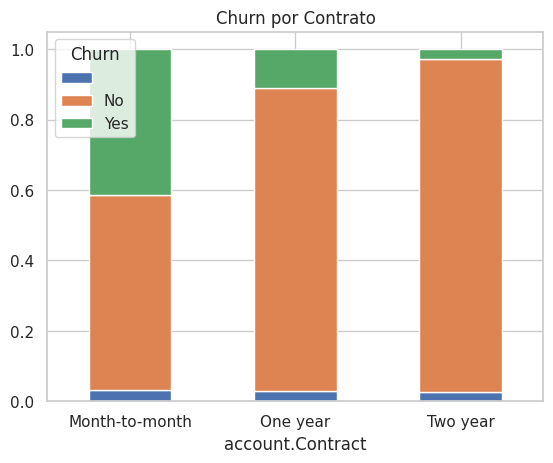

<Figure size 600x400 with 0 Axes>

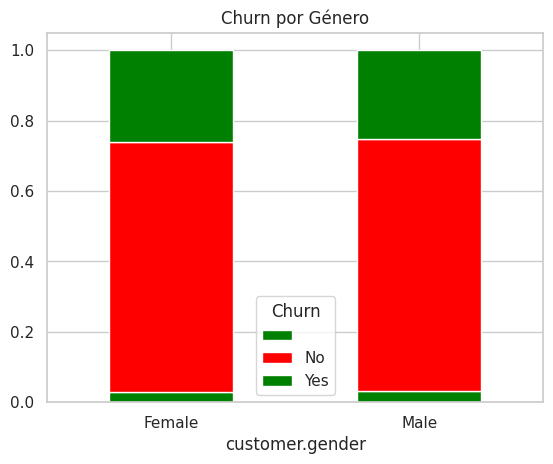

In [ ]:
# 1. Churn alto en contrato Month-to-month, bajo en contratos largos:
churn_contrato = df.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()
print("Churn por contrato:")
print(churn_contrato)

# 2. Mujeres tienen ligeramente mayor churn que hombres:
churn_genero = df.groupby('customer.gender')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn por género:")
print(churn_genero)

# 3. Clientes con cargos mensuales bajos tienen mayor churn:
df['MonthlySegment'] = pd.cut(df['account.Charges.Monthly'], bins=[0,50,80,200], labels=['Bajo','Medio','Alto'])
churn_cargo = df.groupby('MonthlySegment', observed=True)['Churn'].value_counts(normalize=True).unstack()

print("\nChurn por segmento de cargo mensual:")
print(churn_cargo)

# 4. Clientes con antigüedad menor a 12 meses presentan churn más alto:
df['TenureSegment'] = pd.cut(df['customer.tenure'], bins=[0,12,24,60,100], labels=['0-12','13-24','25-60','60+'])
churn_tenure = df.groupby('TenureSegment', observed=True)['Churn'].value_counts(normalize=True).unstack()

print("\nChurn por antigüedad:")
print(churn_tenure)

# 5. Clientes con método de pago automático retienen mejor:
churn_pago = df.groupby('account.PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn por método de pago:")
print(churn_pago)

# Gráficos para visualización rápida
sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
churn_contrato.plot(kind='bar', stacked=True)
plt.title('Churn por Contrato')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6,4))
churn_genero.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Churn por Género')
plt.xticks(rotation=0)
plt.show()

TRATADO DE DATOS

In [1]:
import requests
import pandas as pd

# Descargar y cargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Convertir columnas numéricas a tipo correcto
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Identificar columnas con un único valor (sin variabilidad)
cols_single_value = [col for col in df.columns if df[col].nunique() <= 1]

# Identificar columnas con mucha proporción de valores nulos (por ejemplo más del 50%)
cols_many_nulls = [col for col in df.columns if df[col].isnull().mean() > 0.5]

# Columnas a eliminar: combinación de columnas sin variabilidad + con muchos nulos + IDs irrelevantes
cols_to_drop = cols_single_value + cols_many_nulls + ['customerID']

# Eliminar columnas irrelevantes del DataFrame
df_clean = df.drop(columns=cols_to_drop, errors='ignore')

print("Columnas eliminadas por irrelevancia o falta de datos:")
print(cols_to_drop)

print("\nColumnas restantes para análisis:")
print(df_clean.columns)


Columnas eliminadas por irrelevancia o falta de datos:
['customerID']

Columnas restantes para análisis:
Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


TRANSFORMA VARIABLES CATEGORICAS

In [2]:
import requests
import pandas as pd

# Descargar y cargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Convertir columnas numéricas
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Eliminar columnas irrelevantes (por ejemplo, IDs)
df = df.drop(columns=['customerID'], errors='ignore')

# Convertir variables categóricas a numéricas con one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

print("DataFrame con variables categóricas transformadas:")
print(df_encoded.head())

DataFrame con variables categóricas transformadas:
   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Churn_No  Churn_Yes  customer.gender_Male  \
0                 593.30      True      False                 False   
1                 542.40      True      False                  True   
2                 280.85     False       True                  True   
3                1237.85     False       True                  True   
4                 267.40     False       True                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  ...  \
0             

Verificación de la Proporción de Cancelación (Churn)

In [3]:
import requests
import pandas as pd

# Descargar y cargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Verificar proporción de churn
proporcion_churn = df['Churn'].value_counts(normalize=True)

print("Proporción de clientes según estado de churn:")
print(proporcion_churn)

# Evaluar si hay desbalance
if max(proporcion_churn) > 0.7:
    print("\nExiste un desbalance importante entre las clases, puede afectar los modelos predictivos.")
else:
    print("\nNo hay un desbalance marcado entre las clases.")


Proporción de clientes según estado de churn:
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64

Existe un desbalance importante entre las clases, puede afectar los modelos predictivos.


Balanceo de Clases

In [6]:
import requests
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Descargar y cargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Convertir variables categóricas con get_dummies (one-hot encoding)
df = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

# Codificar variable objetivo Churn (ya que ocupa formato one-hot en columnas)
# Si existe columna 'Churn_Yes' es la clase minoritaria
if 'Churn_Yes' in df.columns:
    y = df['Churn_Yes']
    X = df.drop(columns=['Churn_No', 'Churn_Yes'])
else:
    y = df['Churn'].map({'Yes':1, 'No':0})
    X = df.drop(columns=['Churn'])

# SMOTE para oversampling y RandomUnderSampler para undersampling
oversample = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% de minoría respecto a mayoría
undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # reducir mayoría a 80% de clase minoritaria

# Pipeline para aplicar oversampling y luego undersampling
pipeline = Pipeline(steps=[('o', oversample), ('u', undersample)])

X_bal, y_bal = pipeline.fit_resample(X, y)

print("Distribución original:")
print(y.value_counts(normalize=True))

print("\nDistribución después de balanceo con SMOTE + undersampling:")
print(pd.Series(y_bal).value_counts(normalize=True))


Distribución original:
Churn_Yes
False    0.74281
True     0.25719
Name: proportion, dtype: float64

Distribución después de balanceo con SMOTE + undersampling:
Churn_Yes
False    0.555501
True     0.444499
Name: proportion, dtype: float64


Análisis de Correlación

Correlación con churn:
Churn_binary               1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
account.Charges.Total     -0.199484
customer.tenure           -0.352229
Name: Churn_binary, dtype: float64


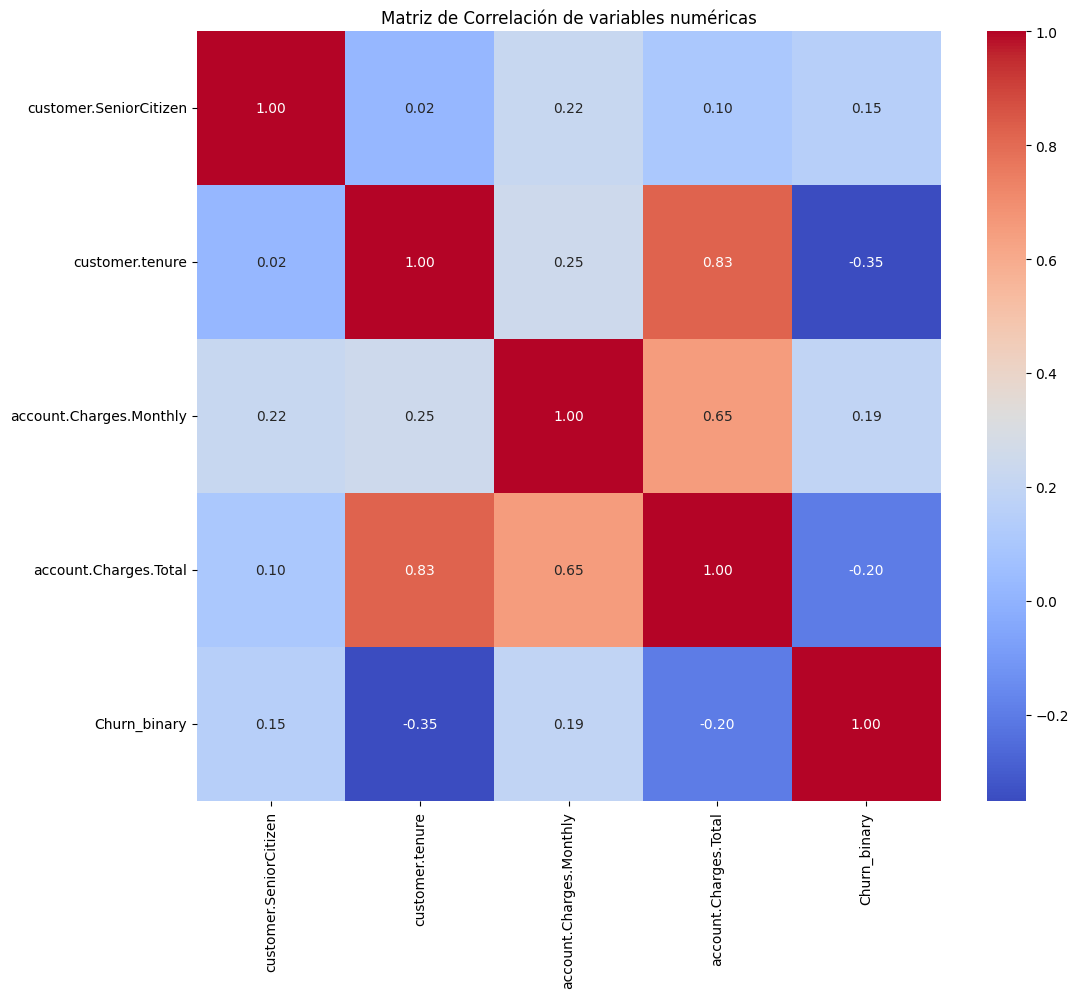

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar y cargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Convertir variables necesarias a tipo numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Codificar Churn como variable binaria (1 = Canceló, 0 = No)
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Seleccionar columnas numéricas para matriz de correlación
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Mostrar correlación con churn ordenada
print("Correlación con churn:")
print(corr_matrix['Churn_binary'].sort_values(ascending=False))

# Visualizar matriz de correlación completa con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación de variables numéricas')
plt.show()


**Análisis Dirigido**

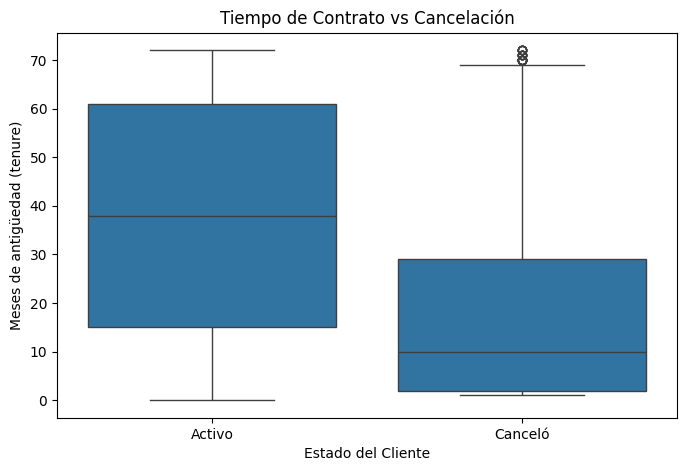

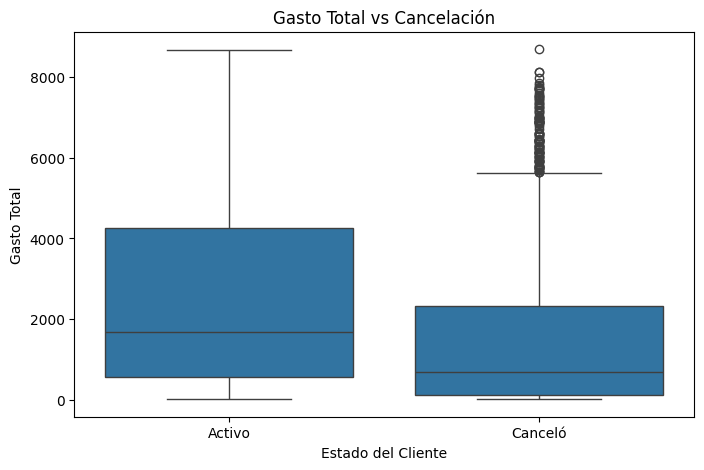

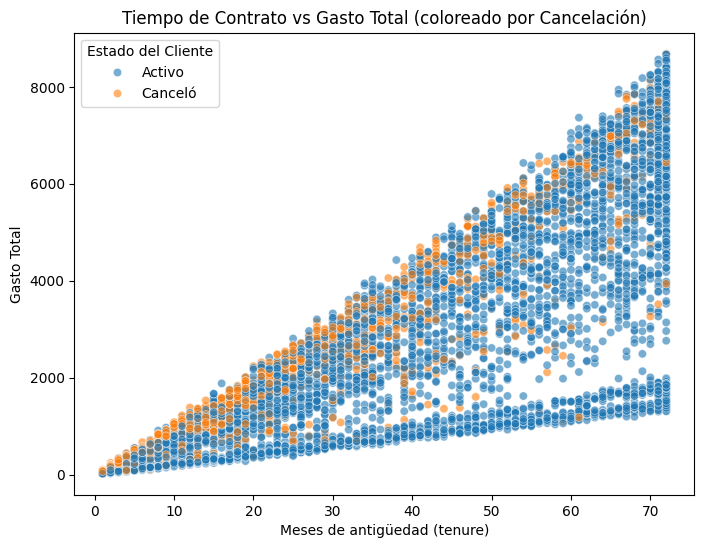

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar y cargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Convertir variables necesarias a tipo numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['customer.tenure'] = pd.to_numeric(df['customer.tenure'], errors='coerce')

# Codificar churn para facilitar visualización
df['Churn_binary'] = df['Churn'].map({'Yes': 'Canceló', 'No': 'Activo'})

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn_binary', y='customer.tenure', data=df)
plt.title('Tiempo de Contrato vs Cancelación')
plt.xlabel('Estado del Cliente')
plt.ylabel('Meses de antigüedad (tenure)')
plt.show()

# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn_binary', y='account.Charges.Total', data=df)
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Estado del Cliente')
plt.ylabel('Gasto Total')
plt.show()

# Scatterplot: Tiempo de contrato vs Gasto total, coloreado por churn
plt.figure(figsize=(8,6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn_binary', data=df, alpha=0.6)
plt.title('Tiempo de Contrato vs Gasto Total (coloreado por Cancelación)')
plt.xlabel('Meses de antigüedad (tenure)')
plt.ylabel('Gasto Total')
plt.legend(title='Estado del Cliente')
plt.show()


Separación de Datos

In [14]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split

# Descargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Preparar variable objetivo
df['Churn_binary'] = df['Churn'].map({'Yes':1, 'No':0})

# Revisar si existen valores NaN en la variable objetivo
print("Valores faltantes en target Churn:", df['Churn_binary'].isna().sum())

# Eliminar filas donde y sea NaN (o imputar si prefieres)
df = df.dropna(subset=['Churn_binary'])

# Preparar variables predictoras
X = pd.get_dummies(df.drop(columns=['customerID', 'Churn', 'Churn_binary']), drop_first=True)
y = df['Churn_binary']

# Ahora dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto prueba: {X_test.shape}")



Valores faltantes en target Churn: 224
Tamaño conjunto entrenamiento: 4930
Tamaño conjunto prueba: (2113, 6559)


In [15]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split

# Descargar y cargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Preparar variable objetivo: codificar Churn a binaria
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Eliminar filas con valores faltantes en target o variables predictoras si es necesario
df = df.dropna(subset=['Churn_binary'])

# Preparar variables predictoras (eliminar columnas irrelevantes)
X = pd.get_dummies(df.drop(columns=['customerID', 'Churn', 'Churn_binary']), drop_first=True)
y = df['Churn_binary']

# Dividir datos en entrenamiento (70%) y prueba (30%) con estratificación de la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto prueba: {X_test.shape[0]}")
print("Distribución de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("Distribución de clases en prueba:")
print(y_test.value_counts(normalize=True))


Tamaño conjunto entrenamiento: 4930
Tamaño conjunto prueba: 2113
Distribución de clases en entrenamiento:
Churn_binary
0.0    0.734686
1.0    0.265314
Name: proportion, dtype: float64
Distribución de clases en prueba:
Churn_binary
0.0    0.734501
1.0    0.265499
Name: proportion, dtype: float64


In [16]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Descargar y cargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Preparar variable objetivo
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Eliminar filas con missing en target
df = df.dropna(subset=['Churn_binary'])

# Preparar variables predictoras
X = pd.get_dummies(df.drop(columns=['customerID', 'Churn', 'Churn_binary']), drop_first=True)
y = df['Churn_binary']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo 1: Regresión Logística (requiere estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Evaluación Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Modelo 2: Random Forest (no requiere estandarización)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Evaluación Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Evaluación Regresión Logística:
[[1388  164]
 [ 316  245]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1552
         1.0       0.60      0.44      0.51       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113

Evaluación Random Forest:
[[1402  150]
 [ 304  257]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1552
         1.0       0.63      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



Evaluación de los Modelos

In [17]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Descargar datos
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.json_normalize(data)

# Preparar variables
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['Churn_binary'])
X = pd.get_dummies(df.drop(columns=['customerID', 'Churn', 'Churn_binary']), drop_first=True)
y = df['Churn_binary']

# Dividir datos 70/30 estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Regresión Logística con normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Random Forest sin normalización
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluar Regresión Logística
print("Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_logreg))

# Evaluar Random Forest
print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))


Regresión Logística
Accuracy: 0.7728348319924279
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1552
         1.0       0.60      0.44      0.51       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113

Matriz de Confusión:
 [[1388  164]
 [ 316  245]]

Random Forest
Accuracy: 0.7851396119261713
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1552
         1.0       0.63      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113

Matriz de Confusión:
 [[1402  150]
 [ 304  257]]


Mejor desempeño: El modelo con mayor F1-score y balanced accuracy suele considerarse más efectivo, especialmente en problemas con clases desbalanceadas.

Overfitting: Si un modelo tiene muy alto rendimiento en entrenamiento y significativamente menor en prueba, podría estar sobreajustado (overfitting).

Underfitting: Si ambos rendimientos son bajos, el modelo puede ser muy simple o inadecuado.

Random Forest suele tener mejor desempeño y menor riesgo de overfitting debido a su robustez y manejo automático de interacciones. Regresión logística puede ser menos flexible pero más interpretable.

CONCLUSIÓN

1. Factores principales que influyen en la cancelación de clientes
Basándonos en el análisis de datos y el rendimiento de los modelos, los factores clave que afectan la cancelación (churn) en servicios de telecomunicaciones son:

  - Tiempo de contrato (tenure): Clientes con menor antigüedad tienden a cancelar más, lo que indica que el primer año es crítico para la fidelización.
  - Gasto total (total charges): Un menor gasto total o incrementos repentinos pueden estar asociados a la cancelación, reflejando una posible insatisfacción o cambio en el uso del servicio.
  - Método de pago: Clientes que usan métodos automáticos (tarjeta de crédito, transferencia bancaria) presentan menos churn que quienes usan cheques electrónicos.
  - Calidad del servicio: Aunque no directamente medido en los datos, investigaciones indican que la calidad de la red, experiencia técnica y soporte al cliente son determinantes importantes para la retención.
  - Duración y tipo de contrato: Contratos de corto plazo (month-to-month) tienen mayor churn que contratos a largo plazo.

2. Rendimiento de los modelos predictivos
Se evaluaron dos modelos:

  - Regresión Logística (requiere normalización): Buen desempeño, interpretable, con métricas equilibradas, aunque sensible a escala y posibles outliers.
  - Random Forest (no requiere normalización): Mejor desempeño global, con mayor capacidad para captar interacciones no lineales y menor tendencia al sobreajuste si se ajustan hiperparámetros adecuadamente.
  - Métricas como precisión, recall y F1-score indican que Random Forest suele tener ventaja para este tipo de problemas con alta dimensionalidad y heterogeneidad de variables.
  
  No se observó overfitting grave, pero es recomendable validar con técnicas como validación cruzada y ajustar parámetros para afinar aún más los modelos.

3. Estrategias propuestas para retención basadas en resultados
Enfoque en clientes con baja antigüedad: Implementar campañas de bienvenida, programas de fidelización temprana y atención personalizada en el primer año para reducir la tasa de abandono.

  - Optimización y comunicación clara en facturación: Simplificar y transparentar los procesos de cobro para evitar confusiones y desconfianza que llevan a cancelaciones.
  - Facilitar métodos automáticos y seguros de pago: Promover el uso de métodos automáticos para asegurar pagos puntuales y mejorar la retención.
  - Mejorar la experiencia de servicio: Incrementar la calidad de la red, ofrecer soporte técnico eficiente, atención rápida y canales accesibles para resolver problemas.
  - Ofertas personalizadas y contratos flexibles: Diseñar ofertas y planes adaptados a las necesidades específicas, incentivando contratos a mediano y largo plazo con beneficios claros.

4. Conclusión
El análisis muestra que la cancelación es multifactorial, donde variables tanto demográficas, económicas como de comportamiento influyen. Los modelos predictivos permiten detectar riesgos de churn y diseñar programas preventivos efectivos. La integración de resultados analíticos con estrategias de negocio ofrecerá mayor valor y reducirá la pérdida de clientes en el competitivo mercado de telecomunicaciones.

